In [1]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_boston()
boston_housing = pd.DataFrame(dataset.data, columns= map(str.lower, dataset.feature_names))
boston_housing['medv'] = dataset.target

In [3]:
X_var = boston_housing.iloc[:,:-1]
y_var = boston_housing.iloc[:,-1:]

In [4]:
#alpha = 0.5
model_lasso = Lasso(alpha = 0.5).fit(X_var, y_var['medv'] )

print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lasso.coef_, index = X_var.columns)
coef

The variable coefficients provided by the lasso are:


crim      -0.083289
zn         0.049544
indus     -0.005253
chas       0.000000
nox       -0.000000
rm         2.498212
age        0.003604
dis       -0.936605
rad        0.277451
tax       -0.015442
ptratio   -0.758752
b          0.009469
lstat     -0.656290
dtype: float64

In [5]:
#alpha = 1
model_lasso1 = Lasso(alpha = 1).fit(X_var, y_var['medv'] )

print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lasso1.coef_, index = X_var.columns)
coef

The variable coefficients provided by the lasso are:


crim      -0.063437
zn         0.049165
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         0.949811
age        0.020910
dis       -0.668790
rad        0.264206
tax       -0.015212
ptratio   -0.722966
b          0.008247
lstat     -0.761115
dtype: float64

In [6]:
#use 5-fold cross validation to pick lambda

from sklearn.linear_model import LassoCV

model_lassocv = LassoCV(cv = 5).fit(X_var, y_var['medv'])

print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lassocv.coef_, index = X_var.columns)
coef

The variable coefficients provided by the lasso are:


crim      -0.074266
zn         0.049454
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         1.804385
age        0.011333
dis       -0.813244
rad        0.272284
tax       -0.015425
ptratio   -0.742872
b          0.008926
lstat     -0.703654
dtype: float64

In [7]:
print("The chosen alpha is: ")
model_lassocv.alpha_

The chosen alpha is: 


0.7248204283772595

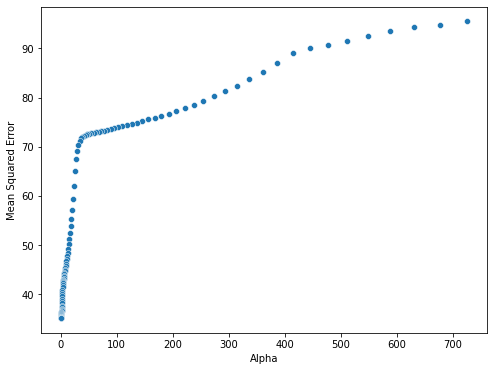

In [8]:
mse_path = model_lassocv.mse_path_.mean(axis = 1)
aplha_path = model_lassocv.alphas_

plt.figure(figsize = (8,6))
sns.scatterplot(aplha_path, mse_path)
plt.ylabel('Mean Squared Error')
plt.xlabel('Alpha')
plt.show()